# Regression and Classification

In this notebook, I built a few regression and classification models to learn how model complexity relates to generalization performance. Theoretically, if we know the perfect model, we could do perform perfect prediction on future examples. Therefore, I will maintain the assumption that the data in this example is drawn from some underlying 'gold standard' model that we *can't* observe directly, but that we would like to estimate. 

We have our actual dataset, which is drawn from a noisy version of the 'gold standard' function that we *do* observe directly.  This dataset is all we have, and we don't have any information about the added noise. As with any standard machine learning setup, we can divide this dataset into training and test sets: fitting the model using the training points, and evaluating the resulting model on the test points. 

By using regression on #2, we try to get at #1. We'll see that by making different assumptions about the nature of the underlying true model, we will get different flavors of regression, which in turn will lead to better or worse fits -- according to how well our assumptions match the actual true model. The most basic assumption is that the true underlying model *is* a polynomial, but of unknown degree. Later, we assume not only that the true underlying model is a polynomial, but that it has sparse coefficients (Lasso) and I'll evaluate the model fit in that case as well.


Lets assume the data follows the following distribution:

The independent variable $x$ consists of $n$ evenly spaced points from the interval $[0, 20]$ and the dependent variable $y = 0.05x^3 - x^2 - x + C \epsilon$ is a function of $x$ where $\epsilon \sim \mathcal{N}(0, 1)$ represents the standard Gaussian noise and $C$ is a constant indicating the noise magnitude.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
C = 15
n = 60
x = np.linspace(0, 20, n)  # x is drawn from a fixed range
y = x ** 3 / 20 - x ** 2 - x + C * np.random.randn(n)

x = x.reshape(-1, 1) # convert x and y from simple array to a 1-column matrix for input to sklearn regression 
y = y.reshape(-1, 1) # convert x and y from simple array to a 1-column matrix for input to sklearn regression

# Create the training and testing sets and their targets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

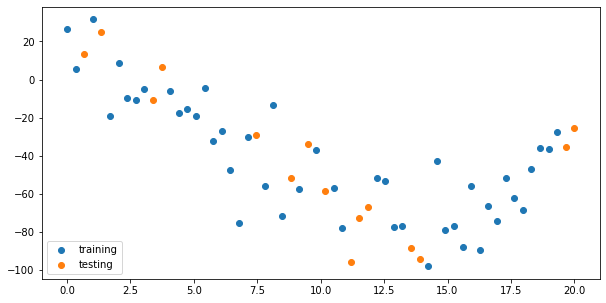

In [49]:
def data_scatter():
    """
    This function helps to visualize the training and testing sets by drawing a scatter plot of the data points.
    Feel free to change the function in any ways to create your own visuals. 
    """
    plt.figure(figsize=(10, 5))
    plt.scatter(X_train, y_train, label='training')
    plt.scatter(X_test, y_test, label='testing')
    plt.legend(loc=3)

data_scatter()

I could write a loop but making repetitive codes allowed me to learn how the library works

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degs = (1, 3, 7, 11)  

def Polynomial_Regression():
    # we will call it and transform for different degrees. Again this can be easily done more neatly by calling a loop
    X_F1_poly1 = PolynomialFeatures(degree = 1).fit_transform(x)
    X_F1_poly3 = PolynomialFeatures(degree = 3).fit_transform(x)
    X_F1_poly7 = PolynomialFeatures(degree = 7).fit_transform(x)
    X_F1_poly11 = PolynomialFeatures(degree = 11).fit_transform(x)
    # we then spilt the data, the random state is simply the lot number of the set generated randomly in any operation
    X_train_1, X_test, y_train, y_test = train_test_split(X_F1_poly1, y, random_state = 0)
    X_train_3, X_test, y_train, y_test = train_test_split(X_F1_poly3, y, random_state = 0)
    X_train_7, X_test, y_train, y_test = train_test_split(X_F1_poly7, y, random_state = 0)
    X_train_11, X_test, y_train, y_test = train_test_split(X_F1_poly11, y, random_state = 0)
    # we then fit the model and segregate each model with a variable and the associated degree used 
    Linreg1 = LinearRegression().fit(X_train_1, y_train)
    Linreg3 = LinearRegression().fit(X_train_3, y_train)
    Linreg7 = LinearRegression().fit(X_train_7, y_train)
    Linreg11 = LinearRegression().fit(X_train_11, y_train)
    
    preds = np.stack((Linreg1.predict(PolynomialFeatures(degree = 1).fit_transform(np.linspace(0, 20, 100).reshape(-1, 1))).transpose(), 
                      Linreg3.predict(PolynomialFeatures(degree = 3).fit_transform(np.linspace(0, 20, 100).reshape(-1, 1))).transpose(),
                      Linreg7.predict(PolynomialFeatures(degree = 7).fit_transform(np.linspace(0, 20, 100).reshape(-1, 1))).transpose(),
                      Linreg11.predict(PolynomialFeatures(degree = 11).fit_transform(np.linspace(0, 20, 100).reshape(-1, 1))).transpose()))
    
    return preds.reshape((4, 100))

Now for each model, we compute the  𝑅2  (coefficient of determination) regression score on the training data as well as the the testing data.

In [20]:
from sklearn.metrics import r2_score

degs = (1, 3, 7, 11)  # this will be useful later

def r2_scores():
    
    X_F1_poly1 = PolynomialFeatures(degree = 1).fit_transform(x)
    X_F1_poly3 = PolynomialFeatures(degree = 3).fit_transform(x)
    X_F1_poly7 = PolynomialFeatures(degree = 7).fit_transform(x)
    X_F1_poly11 = PolynomialFeatures(degree = 11).fit_transform(x)
    
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_F1_poly1, y, random_state = 0)
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_F1_poly3, y, random_state = 0)
    X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_F1_poly7, y, random_state = 0)
    X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_F1_poly11, y, random_state = 0)

    Linreg1 = LinearRegression().fit(X_train_1, y_train_1)
    Linreg3 = LinearRegression().fit(X_train_3, y_train_3)
    Linreg7 = LinearRegression().fit(X_train_7, y_train_7)
    Linreg11 = LinearRegression().fit(X_train_11, y_train_11)
    
    r2_train = [Linreg1.score(X_train_1, y_train_1), 
                Linreg3.score(X_train_3, y_train_3), 
                Linreg7.score(X_train_7, y_train_7), 
                Linreg11.score(X_train_11, y_train_11)]
    
    r2_test = [Linreg1.score(X_test_1, y_test_1), 
               Linreg3.score(X_test_3, y_test_3), 
               Linreg7.score(X_test_7, y_test_7), 
               Linreg11.score(X_test_11, y_test_11)]
    
    return (r2_train, r2_test)

In [13]:
r2_scores()

([0.5146908335931619,
  0.7716782246401617,
  0.7905134245393104,
  0.7966024759412202],
 [0.3660750337906714,
  0.8666116934854097,
  0.811494495363618,
  0.7859354523293266])

We can also fit a k-NN regression model with the training data and return the  𝑅2  value on the testing data. I will be using default hyper-parameters.

In [24]:
from sklearn.neighbors import KNeighborsRegressor

def KNeighborsRegressor_rscore():
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
    r2 = knnreg.score(X_test, y_test)

    return r2

In [25]:
KNeighborsRegressor_rscore()

0.7770358819030301

Based on the $R^2$ scores, we can tell which degree of the polynomial causes the model to be
 - underfitting; 
 - overfitting; or
 - achieving good generalisation performance? 

We will answer this by plotting the degrees of the polynomial against the $R^2$ scores to visualise their relationship. 

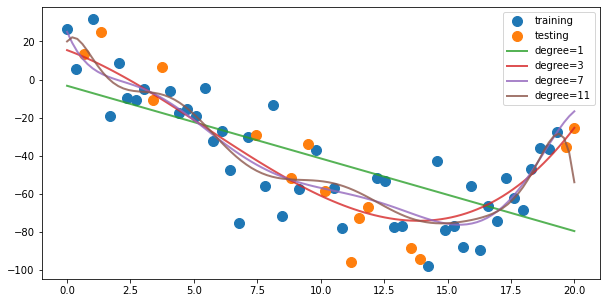

In [19]:
# Now we can plot the polynomials we learned from the training data, along with the training and the testing data
degs = (1, 3, 7, 11)

def plot_one(predictions):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train, y_train, 'o', label = 'training', markersize=10)
    plt.plot(X_test, y_test, 'o', label = 'testing', markersize=10)
    for i, deg in enumerate(degs):
        plt.plot(np.linspace(0, 20, 100), 
                 predictions[i], 
                 alpha=0.8, 
                 lw=2, 
                 label=f"degree={deg}")
    plt.legend(loc="best")
    
plot_one(Polynomial_Regression())

Therefore, degrees 1, 11, 3 are Underfitting, Overfitting, Good_Generalization respectively

## Using Lasso regression for polynomial fitting

In [27]:
from sklearn.linear_model import Lasso

degs = (1, 3, 7, 11)

def Lasso_reg():
    
    X_F1_poly1 = PolynomialFeatures(degree = 1).fit_transform(x)
    X_F1_poly3 = PolynomialFeatures(degree = 3).fit_transform(x)
    X_F1_poly7 = PolynomialFeatures(degree = 7).fit_transform(x)
    X_F1_poly11 = PolynomialFeatures(degree = 11).fit_transform(x)
    
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_F1_poly1, y, random_state = 0)
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_F1_poly3, y, random_state = 0)
    X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_F1_poly7, y, random_state = 0)
    X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_F1_poly11, y, random_state = 0)
    
    linlasso_1 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_1, y_train_1)
    linlasso_3 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_3, y_train_3)
    linlasso_7 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_7, y_train_7)
    linlasso_11 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_11, y_train_11)
    
    preds = np.stack((linlasso_1.predict(PolynomialFeatures(degree = 1).fit_transform(np.linspace(0, 20, 100).reshape(-1, 1))), 
                  linlasso_3.predict(PolynomialFeatures(degree = 3).fit_transform(np.linspace(0, 20, 100).reshape(-1, 1))),
                  linlasso_7.predict(PolynomialFeatures(degree = 7).fit_transform(np.linspace(0, 20, 100).reshape(-1, 1))),
                  linlasso_11.predict(PolynomialFeatures(degree = 11).fit_transform(np.linspace(0, 20, 100).reshape(-1, 1)))))

    return preds

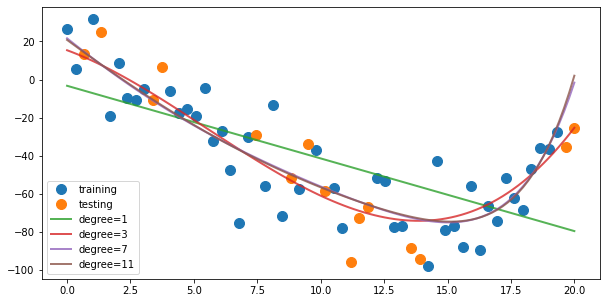

In [28]:
plot_one(Lasso_reg())

Returning the  𝑅2  score for each of the Lasso models above relative to a new 'gold standard' test set generated from the true underlying cubic polynomial model without noise. I will be computing this test set by computing the true noise-less underlying function t^3/20 - t^2 - t for each of 100 evenly spaced points on the interval [0, 20] (the same used in the above examples). The function below computes the  𝑅2  score using this 'gold standard' test set and return the polynomial degree that gives the best fit on the 'gold standard' test set.

In [32]:
degs = (1, 3, 7, 11)

def r_scores_lasso():
    
    C = 15
    n = 100
    x = np.linspace(0, 20, n)  # x is drawn from a fixed range
    y = x ** 3 / 20 - x ** 2 - x

    x = x.reshape(-1, 1) # convert x and y from simple array to a 1-column matrix for input to sklearn regression 
    y = y.reshape(-1, 1) # convert x and y from simple array to a 1-column matrix for input to sklearn regression 
    
    X_F1_poly1 = PolynomialFeatures(degree = 1).fit_transform(x)
    X_F1_poly3 = PolynomialFeatures(degree = 3).fit_transform(x)
    X_F1_poly7 = PolynomialFeatures(degree = 7).fit_transform(x)
    X_F1_poly11 = PolynomialFeatures(degree = 11).fit_transform(x)
    
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_F1_poly1, y, random_state = 0)
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_F1_poly3, y, random_state = 0)
    X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_F1_poly7, y, random_state = 0)
    X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_F1_poly11, y, random_state = 0)
    
    linlasso_1 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_1, y_train_1)
    linlasso_3 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_3, y_train_3)
    linlasso_7 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_7, y_train_7)
    linlasso_11 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_11, y_train_11)
    
    
    rsquare_dict = {1: linlasso_1.score(X_test_1, y_test_1),
                    3: linlasso_3.score(X_test_3, y_test_3),
                    7: linlasso_7.score(X_test_7, y_test_7),
                    11: linlasso_11.score(X_test_11, y_test_11)}

    return max(rsquare_dict, key=rsquare_dict.get)

In [31]:
r_scores_lasso()

3

## Applying a SVC classifier to a breast cancer dataset from sklearn.datasets

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_breast_cancer

In [43]:
cancer = load_breast_cancer()
data      = np.hstack([cancer["data"], cancer["target"].reshape(-1, 1)])
col_names = np.hstack([cancer["feature_names"], ["target"]])
cancer_df = pd.DataFrame(data, columns=col_names)

X_cancer, y_cancer = cancer_df.iloc[:, :-1], cancer_df.iloc[:, -1]

In [44]:
def svc_class():
    
    param_range = np.logspace(-7, -2, 6, endpoint=True)
    train_scores, test_scores = validation_curve(SVC(), X_cancer, y_cancer,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)
    results = train_scores.mean(axis = 1), test_scores.mean(axis = 1)

    return results

In [45]:
svc_class()

(array([0.89631301, 0.91653011, 0.92882007, 0.95166644, 0.9780262 ,
        1.        ]),
 array([0.89462545, 0.91218788, 0.91918686, 0.93146756, 0.92089483,
        0.62565673]))

Based on the scores above, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset?

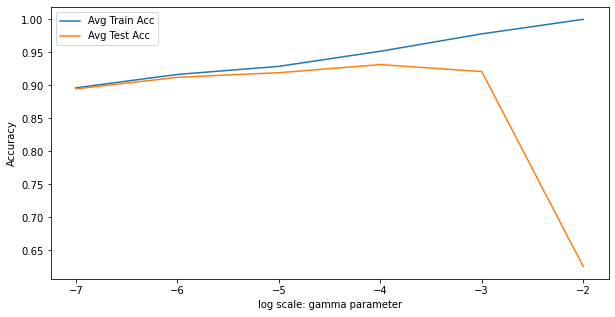

In [48]:
a, b = svc_class()
x = np.arange(-7, -1, 1)
plt.figure(figsize=(10, 5))
plt.plot(x, a, label="Avg Train Acc")
plt.plot(x, b, label="Avg Test Acc")
plt.xticks(x)
plt.xlabel('log scale: gamma parameter')
plt.ylabel("Accuracy")
plt.legend(loc= "best")
plt.show()